# Variations of diffusion term with depth of the box of SPNA and ESNA

### Fig 11 for Siddiqui_et_al

In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt 
import cmocean
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import matplotlib as mpl

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': '24',
         'axes.titlesize':'24',
         'xtick.labelsize':'24',
         'ytick.labelsize':'24'}
pylab.rcParams.update(params)

from matplotlib.ticker import AutoMinorLocator


In [3]:
pylab.rcParams.update({
  "text.usetex": True
})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [4]:
data_dir = '/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/'

ds = xr.open_mfdataset(data_dir+'depths_balance/Iceland_basin/*.nc', combine='nested', concat_dim=["i"])

#ds_mxld_spna = xr.open_dataset(data_dir+'eccov4r4_mxld_spna.nc')
ds_mxld_iceland_basin = xr.open_dataset(data_dir+'eccov4r4_mxld_iceland_basin.nc')


In [5]:
ds

<xarray.Dataset>
Dimensions:  (time: 310, i: 49)
Coordinates:
    dt       (time) float64 dask.array<chunksize=(310,), meta=np.ndarray>
  * time     (time) datetime64[ns] 1992-02-15T12:00:00 ... 2017-11-16
    month    (time) int64 dask.array<chunksize=(310,), meta=np.ndarray>
Dimensions without coordinates: i
Data variables:
    frc      (i, time) float64 dask.array<chunksize=(1, 310), meta=np.ndarray>
    tnd      (i, time) float64 dask.array<chunksize=(1, 310), meta=np.ndarray>
    adv      (i, time) float64 dask.array<chunksize=(1, 310), meta=np.ndarray>
    dif      (i, time) float64 dask.array<chunksize=(1, 310), meta=np.ndarray>
    hdif     (i, time) float64 dask.array<chunksize=(1, 310), meta=np.ndarray>
    vdif     (i, time) float64 dask.array<chunksize=(1, 310), meta=np.ndarray>

In [6]:
ds_salt_anom_adv_diff_IB_200 = ds.isel(i=16)
ds_salt_anom_adv_diff_IB_400 = ds.isel(i=20)
ds_salt_anom_adv_diff_IB_720 = ds.isel(i=24)
ds_salt_anom_adv_diff_IB_1500 = ds.isel(i=32)

In [7]:
datasets = [ds_salt_anom_adv_diff_IB_200, 
            ds_salt_anom_adv_diff_IB_400,
            ds_salt_anom_adv_diff_IB_720 ,
            #ds_salt_anom_adv_diff_SPNA_1000 ,
            ds_salt_anom_adv_diff_IB_1500] ,
            # ds_salt_anom_adv_diff_SPNA_2000 ,
            # ds_salt_anom_adv_diff_SPNA_3000,
            # ds_salt_anom_adv_diff_SPNA_4000 ,
            # ds_salt_anom_adv_diff_SPNA_5000 ,
            # ds_salt_anom_adv_diff_SPNA_6000]
            

In [8]:
datasets[0][0]

<xarray.Dataset>
Dimensions:  (time: 310)
Coordinates:
    dt       (time) float64 dask.array<chunksize=(310,), meta=np.ndarray>
  * time     (time) datetime64[ns] 1992-02-15T12:00:00 ... 2017-11-16
    month    (time) int64 dask.array<chunksize=(310,), meta=np.ndarray>
Data variables:
    frc      (time) float64 dask.array<chunksize=(310,), meta=np.ndarray>
    tnd      (time) float64 dask.array<chunksize=(310,), meta=np.ndarray>
    adv      (time) float64 dask.array<chunksize=(310,), meta=np.ndarray>
    dif      (time) float64 dask.array<chunksize=(310,), meta=np.ndarray>
    hdif     (time) float64 dask.array<chunksize=(310,), meta=np.ndarray>
    vdif     (time) float64 dask.array<chunksize=(310,), meta=np.ndarray>

### Anomaly budget for SPNA and Iceland basin

Text(0.5, 1.0, '1500')

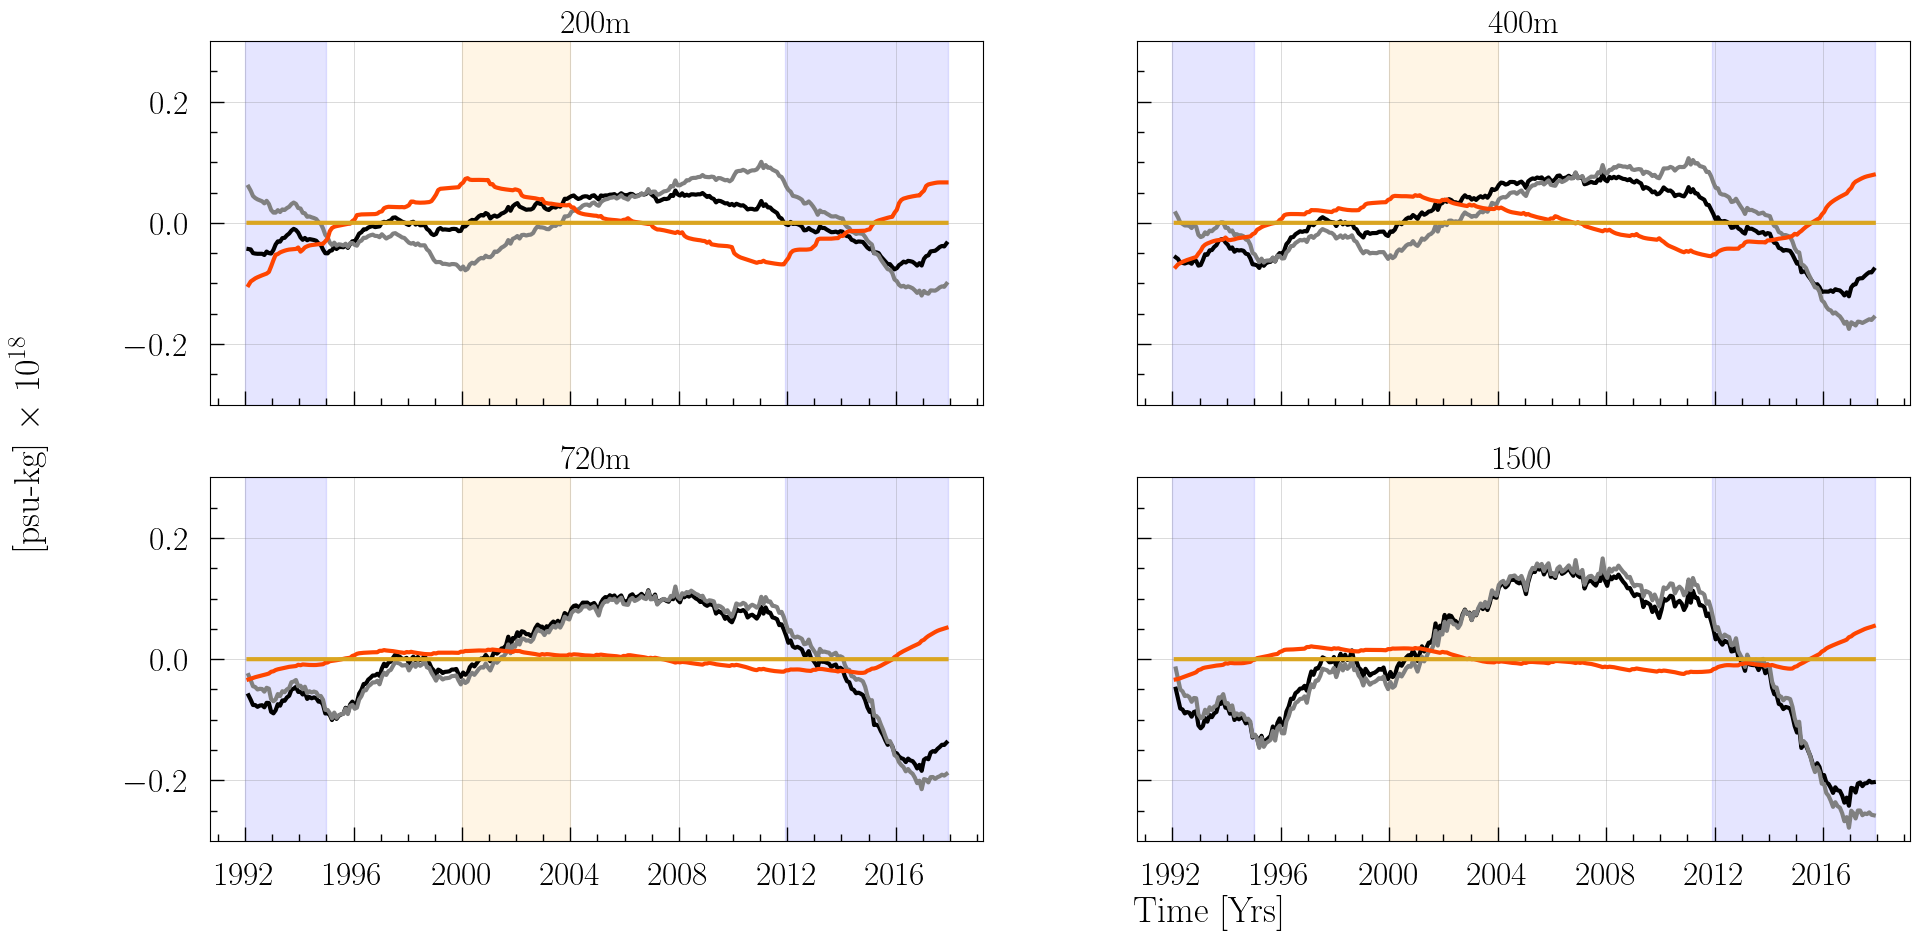

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True, figsize=(25,10))

axs = axs.flatten()

datasets = [ds_salt_anom_adv_diff_IB_200, 
            ds_salt_anom_adv_diff_IB_400,
            ds_salt_anom_adv_diff_IB_720 ,
            #ds_salt_anom_adv_diff_SPNA_1000 ,
            ds_salt_anom_adv_diff_IB_1500] ,
            # ds_salt_anom_adv_diff_SPNA_2000 ,
            # ds_salt_anom_adv_diff_SPNA_3000,
            # ds_salt_anom_adv_diff_SPNA_4000 ,
            # ds_salt_anom_adv_diff_SPNA_5000 ,
            # ds_salt_anom_adv_diff_SPNA_6000]

for i in range(4):
    
    axs[i].grid(linestyle='-', linewidth='0.5', color='grey')
    axs[i].plot(datasets[0][i].time, datasets[0][i].tnd*1e-18, lw=3, color='black',label=r'Salt anomaly')
    axs[i].plot(datasets[0][i].time, datasets[0][i].adv*1e-18, lw=3, color='grey',label=r'Advection')
    axs[i].plot(datasets[0][i].time, datasets[0][i].dif*1e-18, lw=3, color='orangered',label=r'Diffusion')
    axs[i].plot(datasets[0][i].time, datasets[0][i].frc*1e-18, lw=3, color='goldenrod',label=r'Forcing')



    axs[i].grid(True, alpha=0.4)
    axs[i].tick_params(which='both',
                   labelcolor='k', 
                   labelsize=24, 
                   direction='in',
                   width=1,
                   length=10,
                   pad=15)
#axs[0].set_xticks([])

    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].tick_params(which='minor', direction='in', length=5, width=1, color='k')


    axs[i].set_ylim([-0.3, 0.3])
    axs[i].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)
    axs[i].axvspan(xmin='2000-01',xmax='2004-01',color='orange',alpha=0.1)
    axs[i].axvspan(xmin='2011-12',xmax='2017-12',color='blue',alpha=0.1)

    
# axs[0].legend(loc='lower left', ncol=4, bbox_to_anchor=(0.1, -0.2),frameon=False,fontsize=20)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

fig.supylabel(r'[psu-kg] $\times$ 10$^{18}$', fontsize=26)
fig.supxlabel(r'Time [Yrs]', fontsize=26)

#axs[0].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$', labelpad=20)
#axs[0].set_xlabel('Time [Yrs]')
    
axs[0].set_title(r'200m')
axs[1].set_title(r'400m')
axs[2].set_title(r'720m')
axs[3].set_title(r'1500')
# axs[4].set_title(r'1500m')
# axs[5].set_title(r'2000m')
# axs[6].set_title(r'3000m')
# axs[7].set_title(r'4000m')
# axs[8].set_title(r'5000m')
# axs[9].set_title(r'6000m')

#plt.savefig('figs/IB_depth_vs_budget_balance.png', format='png', bbox_inches='tight', facecolor='white', dpi=400)


### Decomposing Diffusion and advection

Opening ECCO.
ECCO v4r4 3D dataset, ocean simulations on LLC90 grid (monthly mean output)


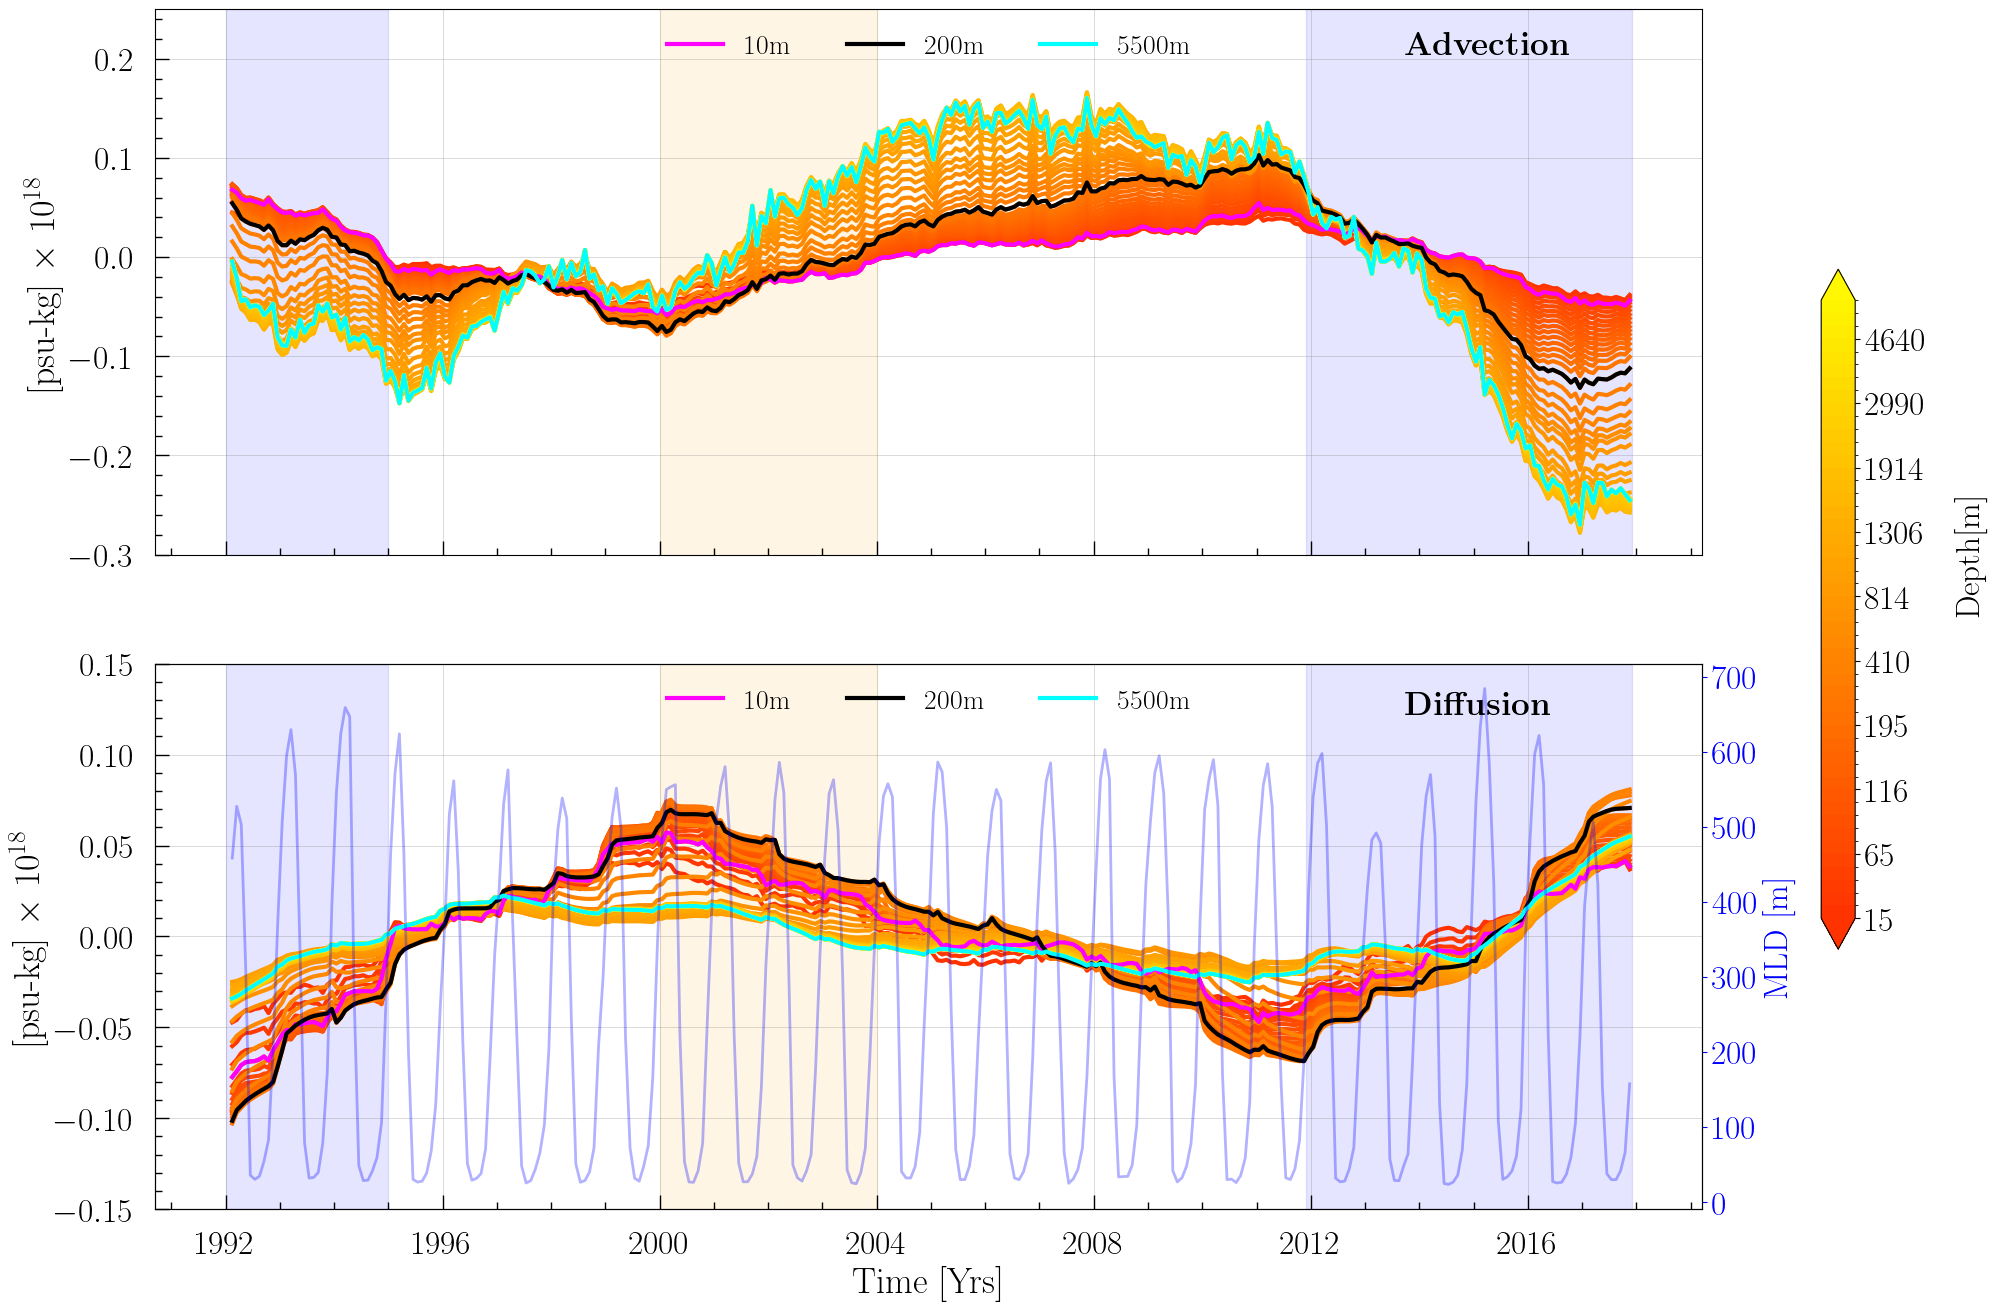

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharey=False, sharex=True, figsize=(25,15))

axs = axs.flatten()

red_shades = np.linspace(0, 1, 50)

for i in range(49):
    
    color = (1, 0.2+0.79*red_shades[i], 0, 1)  # RGBA color, where the fourth value is transparency

    axs[0].grid(linestyle='-', linewidth='0.5', color='grey')
    axs[0].plot(ds.sel(i=i).time, ds.sel(i=i).adv*1e-18, lw=3, color=color)

axs[0].plot(ds.sel(i=3).time, ds.sel(i=3).adv*1e-18, lw=3, color='magenta', label=r'10m')
axs[0].plot(ds.sel(i=17).time, ds.sel(i=17).adv*1e-18, lw=3, color='k', label=r'200m')
axs[0].plot(ds.sel(i=48).time, ds.sel(i=48).adv*1e-18, lw=3, color='cyan', label='5500m')
    
#axs2 = axs.twinx()
#axs2.plot(ds_mxld_iceland_basin.time, ds_mxld_iceland_basin.MXLDEPTH, lw=2, alpha=0.3, color='blue',label=r'MXLD')
#axs2.tick_params(axis='y', labelcolor='b', color='b')

axs[0].legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1),frameon=False,fontsize=20)
#axs2.legend(loc='lower left', ncol=1, bbox_to_anchor=(0.72, -0.2),frameon=False,fontsize=20)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

axs[0].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$', fontsize=26)
#axs[0].set_xlabel(r'Time [Yrs]', fontsize=26)

axs[0].grid(True, alpha=0.4)
axs[0].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)
axs[0].set_ylim([-0.3,0.25])

axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='minor', direction='in', length=5, width=1, color='k')


for i in range(49):
    
    color = (1, 0.2+0.79*red_shades[i], 0, 1)  # RGBA color, where the fourth value is transparency

    axs[1].grid(linestyle='-', linewidth='0.5', color='grey')
    axs[1].plot(ds.sel(i=i).time, ds.sel(i=i).dif*1e-18, lw=3, color=color)

axs[1].plot(ds.sel(i=3).time, ds.sel(i=3).dif*1e-18, lw=3, color='magenta', label=r'10m')
axs[1].plot(ds.sel(i=17).time, ds.sel(i=17).dif*1e-18, lw=3, color='k', label=r'200m')
axs[1].plot(ds.sel(i=48).time, ds.sel(i=48).dif*1e-18, lw=3, color='cyan', label='5500m')
    
axs2 = axs[1].twinx()
axs2.plot(ds_mxld_iceland_basin.time, ds_mxld_iceland_basin.MXLDEPTH, lw=2, alpha=0.3, color='blue',label=r'MXLD')
axs2.tick_params(axis='y', labelcolor='b', color='b')
axs2.set_ylabel("MLD [m]", color='b')

axs[1].legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1),frameon=False,fontsize=20)
#axs2.legend(loc='lower left', ncol=1, bbox_to_anchor=(0.72, -0.2),frameon=False,fontsize=20)
fig.subplots_adjust(left=0.1, right=0.78, bottom=0.1, top=0.9)

axs[1].set_ylabel(r'[psu-kg] $\times$ 10$^{18}$', fontsize=26)
axs[1].set_xlabel(r'Time [Yrs]', fontsize=26)

axs[1].grid(True, alpha=0.4)
axs[1].tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)
axs[1].set_ylim([-0.15,0.15])

axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(which='minor', direction='in', length=5, width=1, color='k')


# shadings

axs[0].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)
axs[0].axvspan(xmin='2000-01',xmax='2004-01',color='orange',alpha=0.1)
axs[0].axvspan(xmin='2011-12',xmax='2017-12',color='blue',alpha=0.1)

axs[1].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)
axs[1].axvspan(xmin='2000-01',xmax='2004-01',color='orange',alpha=0.1)
axs[1].axvspan(xmin='2011-12',xmax='2017-12',color='blue',alpha=0.1)

        
# Making a colorbar
color=[]
red_shades = np.linspace(0,1,50)
for i in range(49):
    color.append((1, 0.2+0.79*red_shades[i], 0, 1))  # RGBA color, where the fourth value is transparency
depth = ospy.open_oceandataset.from_catalog('ECCO')._ds.Z
    
cmap = (mpl.colors.ListedColormap(colors=color))
bounds = -depth[1:].values
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    ax=axs, orientation='vertical',
    extend='both',
    spacing='uniform', 
    fraction=0.02, pad=0.07) 

plt.figtext(0.82,0.5, 'Depth[m]', rotation='vertical',fontsize=24)

plt.figtext(0.6,0.87, r'\textbf{Advection}', fontsize=24)
plt.figtext(0.6,0.43, r'\textbf{Diffusion}', fontsize=24)

plt.savefig('figs/Fig_11.pdf', format='pdf', bbox_inches='tight', facecolor='white', dpi=400)